Converts metadata.tsv to pandas DataFrame and do EDA.

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('metadata.tsv',sep='\t')

In [4]:
df

,show_uri,show_name,show_description,publisher,language,rss_link,episode_uri,episode_name,episode_description,duration,show_filename_prefix,episode_filename_prefix
0,spotify:show:2NYtxEZyYelR6RMKmjfPLB,Kream in your Koffee,A 20-something blunt female takes on the world...,Katie Houle,['en'],https://anchor.fm/s/11b84b68/podcast/rss,spotify:episode:000A9sRBYdVh66csG2qEdj,1: It’s Christmas Time!,On the first ever episode of Kream in your Kof...,12.700133,show_2NYtxEZyYelR6RMKmjfPLB,000A9sRBYdVh66csG2qEdj
1,spotify:show:15iWCbU7QoO23EndPEO6aN,Morning Cup Of Murder,Ever wonder what murder took place on today in...,Morning Cup Of Murder,['en'],https://anchor.fm/s/b07181c/podcast/rss,spotify:episode:000HP8n3hNIfglT2wSI2cA,The Goleta Postal Facility shootings- January ...,"See something, say something. It’s a mantra ma...",6.019383,show_15iWCbU7QoO23EndPEO6aN,000HP8n3hNIfglT2wSI2cA
2,spotify:show:6vZRgUFTYwbAA79UNCADr4,Inside The 18 : A Podcast for Goalkeepers by G...,Inside the 18 is your source for all things Go...,Inside the 18 GK Media,['en'],https://anchor.fm/s/81a072c/podcast/rss,spotify:episode:001UfOruzkA3Bn1SPjcdfa,Ep.36 - Incorporating a Singular Goalkeeping C...,Today’s episode is a sit down Michael and Omar...,43.616333,show_6vZRgUFTYwbAA79UNCADr4,001UfOruzkA3Bn1SPjcdfa
3,spotify:show:5BvKEjaMSuvUsGROGi2S7s,Arrowhead Live!,Your favorite podcast for everything @Chiefs! ...,Arrowhead Live!,['en-US'],https://anchor.fm/s/917dba4/podcast/rss,spotify:episode:001i89SvIQgDuuyC53hfBm,Episode 1: Arrowhead Live! Debut,Join us as we take a look at all current Chief...,58.189200,show_5BvKEjaMSuvUsGROGi2S7s,001i89SvIQgDuuyC53hfBm
4,spotify:show:7w3h3umpH74veEJcbE6xf4,FBoL,"The comedy podcast about toxic characters, wri...",Emily Edwards,['en'],https://www.fuckboisoflit.com/episodes?format=rss,spotify:episode:0025RWNwe2lnp6HcnfzwzG,"The Lion, The Witch, And The Wardrobe - Ashley...",The modern morality tail of how to stay good f...,51.782050,show_7w3h3umpH74veEJcbE6xf4,0025RWNwe2lnp6HcnfzwzG
5,spotify:show:5ljREb8VLogQLT7AKGwav1,UPSC Podcasts,Podcasts useful for UPSC aspirants! Mainly dis...,UPSC Podcast,['en'],https://anchor.fm/s/8afceec/podcast/rss,spotify:episode:0025w0gdgkl11Nzkmg1wnm,Tourism in India : Opportunities and Challenges,.,13.788000,show_5ljREb8VLogQLT7AKGwav1,0025w0gdgkl11Nzkmg1wnm
6,spotify:show:3VHIM25lUuRw3kZktdTbFY,The Feminization Boudoir,Enter the world of dominant women and submissi...,Kylie Gable,['en'],https://anchor.fm/s/b28796c/podcast/rss,spotify:episode:002NDlaaJN4vUczXHDHqWZ,The Sissy's Mentor (Part 5),Miss Jenn Davis reads the final part of The Si...,30.589200,show_3VHIM25lUuRw3kZktdTbFY,002NDlaaJN4vUczXHDHqWZ
7,spotify:show:6fqU8lOAcqQKOxesKOLqRh,Chastity and The City,"We are four, 30 somethings living in a city sh...",Chastity,['en'],https://anchor.fm/s/fa62700/podcast/rss,spotify:episode:002SVJwVLa487RmcijXJ42,Our Journey with Chastity,In today's episode of Chasity and the City we ...,39.437133,show_6fqU8lOAcqQKOxesKOLqRh,002SVJwVLa487RmcijXJ42
8,spotify:show:0g0gZz74AKcS1MpJJ1T01N,They Had to Go Out,Get ready to whiten those knuckles and hold fa...,They Had to Go Out,['en'],https://anchor.fm/s/7f6f0c0/podcast/rss,spotify:episode:002UpWk6zCgvHSAzmvohRG,Episode 50: Dan Shirey - BM - Surfman - 44 MLB...,Former Boatswain’s Mate Dan Shirey talks pitch...,58.469783,show_0g0gZz74AKcS1MpJJ1T01N,002UpWk6zCgvHSAzmvohRG
9,spotify:show:1dyTrS3vDtpClrURfKdo3q,The Good Sign,Let’s be real and honest! Life can be challeng...,Donna Simantov,['en'],https://anchor.fm/s/fef17a8/podcast/rss,spotify:episode:003EmVD7eAmRTBSwHXqi1W,Talia and me part 2!,Join us as we learn the tricks and tips of sta...,31.074483,show_1dyTrS3vDtpClrURfKdo3q,003EmVD7eAmRTBSwHXqi1W


In [179]:
df.show_name.value_counts()

Chompers                                                   1072
Dr Berg’s Healthy Keto and Intermittent Fasting Podcast     746
Coach Corey Wayne                                           615
Optimal Living Daily: Personal Development & Minimalism     424
Daily Fortnite                                              417
                                                           ... 
Sebins Arena                                                  1
SmallPharma                                                   1
Girl CEO®️                                                    1
Mike’s House                                                  1
Whatbetchestalkabout                                          1
Name: show_name, Length: 18290, dtype: int64

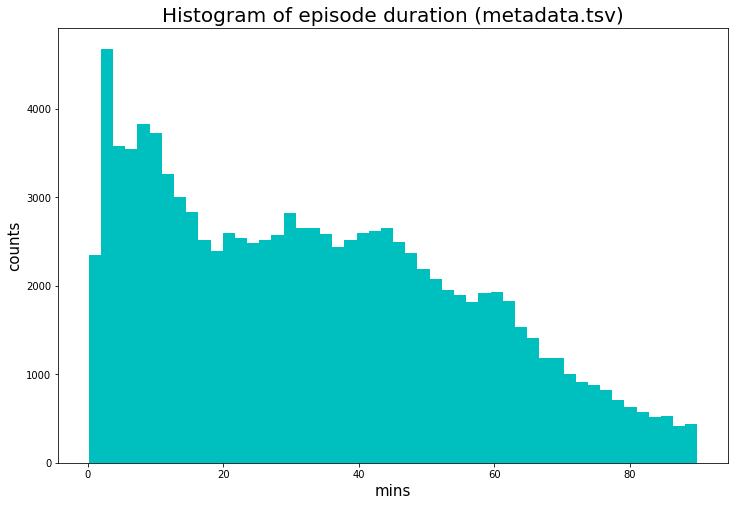

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.set_title('Histogram of episode duration (metadata.tsv)', fontsize = 20)
ax.hist(df['duration'][df['duration'] <= 90], bins = 50, color = 'c')
ax.set_xlabel('mins', fontsize = 15)
ax.set_ylabel('counts', fontsize = 15)

plt.show()

In [3]:
show_rss_data = pd.read_csv('show_rss_data.csv')
episode_rss_data = pd.read_csv('episode_df.csv')

In [4]:
episode_rss_data['duration_mins'] = pd.to_numeric(episode_rss_data.duration, errors='coerce').astype('Int64')

In [5]:
episode_rss_data['duration_mins'] = episode_rss_data['duration_mins'] / 60

In [80]:
episode_rss_data

,show_id,episode_title,duration,season,episode_number,episode_type,category,subcategory,duration_mins
0,show_002B8PbILr169CdsS9ySTH.xml,"EP #5 | Fireworks, ARMY & Pakistan Pt2",2296,NaN,5.0,full,Society & Culture,NaN,38.266667
1,show_002B8PbILr169CdsS9ySTH.xml,"EP #4 | Parents, Pollution & Pakistan",2040,NaN,4.0,full,Society & Culture,NaN,34.000000
2,show_002B8PbILr169CdsS9ySTH.xml,"EP #3 | Useless Jobs, Lullabies & the Police",2905,NaN,NaN,full,Society & Culture,NaN,48.416667
3,show_002B8PbILr169CdsS9ySTH.xml,"Ep #2 | Poo, Party Tricks & Cholesterol.",3690,NaN,2.0,full,Society & Culture,NaN,61.500000
4,show_002B8PbILr169CdsS9ySTH.xml,"Ep #1 | Mim, Mems & Mates",3430,NaN,1.0,full,Society & Culture,NaN,57.166667
5,show_005ZAjJK1wlD4E2YxeibBb.xml,EPISODE 37: The Importance of having an Online...,1912,NaN,NaN,full,Leisure,NaN,31.866667
6,show_005ZAjJK1wlD4E2YxeibBb.xml,EPISODE 36: Conspiracy Theories Part 1 (Corona...,1380,NaN,NaN,full,Leisure,NaN,23.000000
7,show_005ZAjJK1wlD4E2YxeibBb.xml,EPISODE 35: Universities need to CANCEL the se...,1036,NaN,NaN,full,Leisure,NaN,17.266667
8,show_005ZAjJK1wlD4E2YxeibBb.xml,EPISODE 34: Why WE need to STAY TF Home (Coron...,871,NaN,NaN,full,Leisure,NaN,14.516667
9,show_005ZAjJK1wlD4E2YxeibBb.xml,EPISODE 33: My Nighttime Therapy 😴,1253,NaN,NaN,full,Leisure,NaN,20.883333


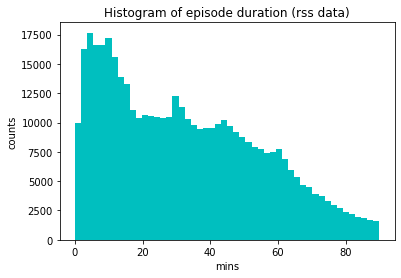

In [187]:
fig, ax = plt.subplots(1, 1, sharey=True)

ax.set_title('Histogram of episode duration (rss data)')
ax.hist(episode_rss_data['duration_mins'][episode_rss_data['duration_mins'] <= 90], bins = 50, color = 'c')
ax.set_xlabel('mins')
ax.set_ylabel('counts')

plt.show()

In [6]:
show_episode_count_df = df.groupby('show_name').count()['episode_name'].sort_values(ascending=False).reset_index()
show_episode_count_df.rename(columns = {'episode_name':'counts'}, inplace = True)

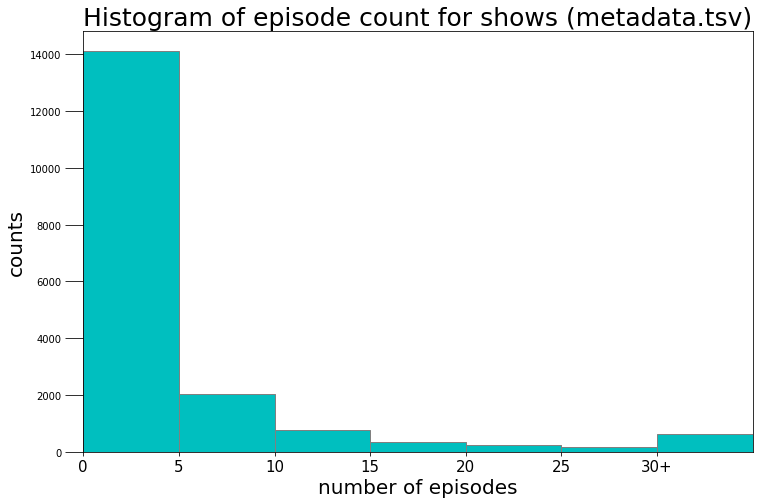

In [37]:
bins_list = [0,5,10,15,20,25,30, show_episode_count_df['counts'].max()]
plt.figure(figsize=(12,8))
#fig, ax = plt.subplots()

plt.title('Histogram of episode count for shows (metadata.tsv)', fontsize = 25)
# ax.hist(show_episode_count['counts'], bins = bins_list, color = 'c')
plt.xlabel('number of episodes', fontsize = 20)
plt.ylabel('counts', fontsize = 20)


counts, bins, patches = plt.hist(show_episode_count_df['counts'], bins = bins_list, facecolor='c', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
bins_list_str = ['0','5', '10','15','20','25','30+']


# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.xticks(ticks = bins_list[:-1], labels = bins_list_str, fontsize = 15)
plt.tick_params(axis="y", colors="black", size = 18)
plt.xlim(0,35)

plt.show()

In [43]:
total = 18290
for patch in patches:
    
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    print('{:.2f}%'.format(100*y/total))
    
print(total)

77.12%
11.13%
4.15%
1.98%
1.34%
0.84%
3.44%
18290


In [131]:
show_episode_count = episode_rss_data.groupby('show_id').count()['episode_title'].sort_values(ascending=False).reset_index()
show_episode_count.rename(columns = {'episode_title':'counts'}, inplace = True)

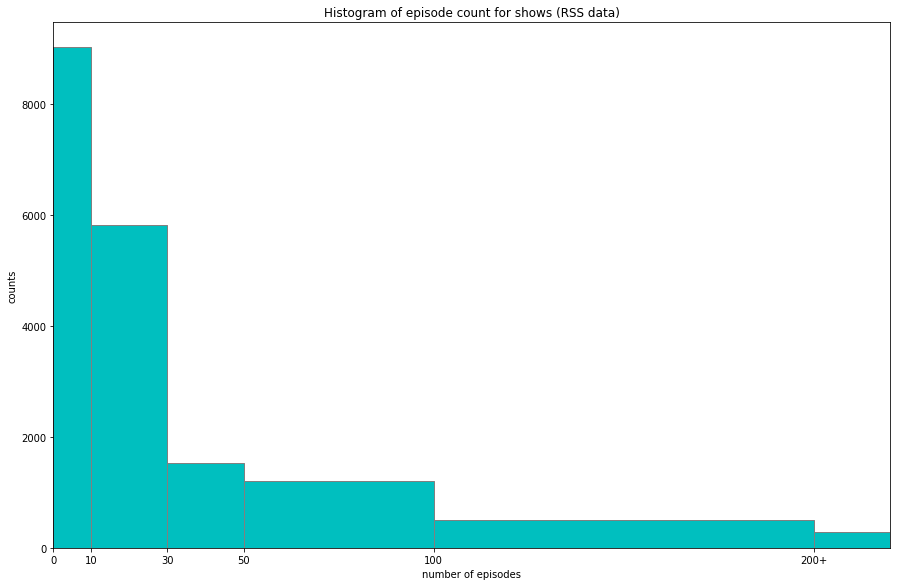

In [190]:
bins_list = [0, 10,30, 50, 100, 200, show_episode_count['counts'].max()]
plt.figure(figsize=(15,10))
#fig, ax = plt.subplots()

plt.title('Histogram of episode count for shows (RSS data)')
# ax.hist(show_episode_count['counts'], bins = bins_list, color = 'c')
plt.xlabel('number of episodes')
plt.ylabel('counts')


counts, bins, patches = plt.hist(show_episode_count['counts'], bins = bins_list, facecolor='c', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
bins_list_str = ['0', '10','30', '50', '100', '200+',]

# Give ourselves some more room at the bottom of the plot
plt.subplots_adjust(bottom=0.15)
plt.xticks(ticks = bins_list[:-1], labels = bins_list_str)
plt.xlim(0,220)

plt.show()

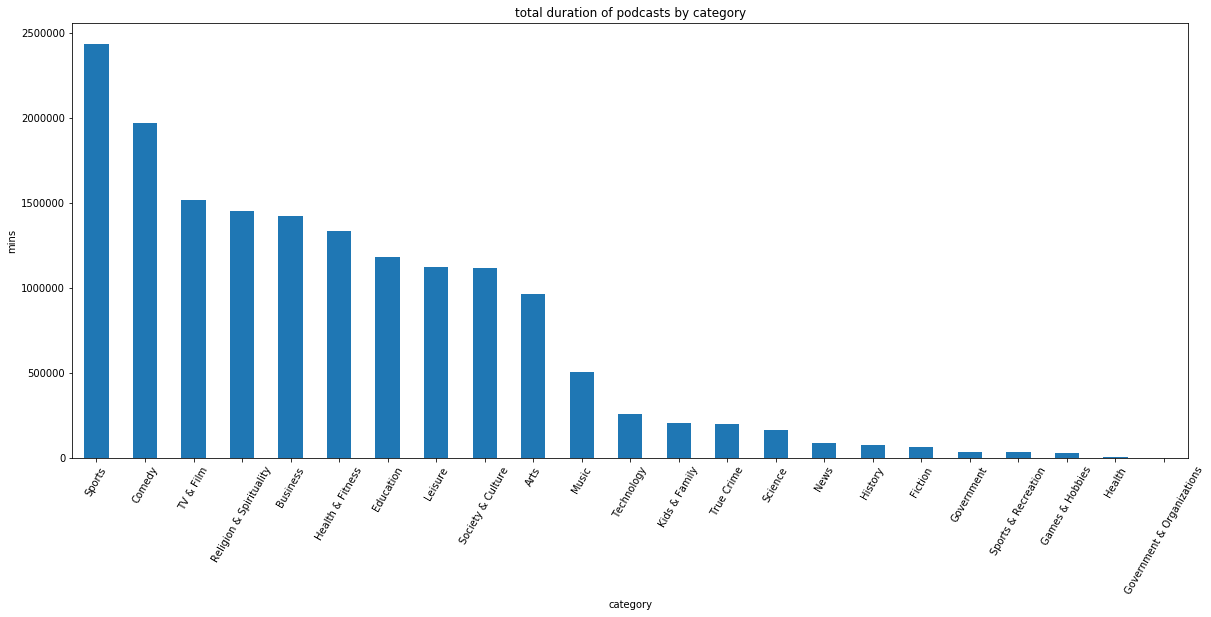

In [70]:
ax = episode_rss_data.groupby('category').sum()['duration_mins'].sort_values(ascending=False).plot(kind='bar',figsize=(20,8),title="total duration of podcasts by category")
ax.set_ylabel('mins')
plt.xticks(rotation = 60)
plt.show()

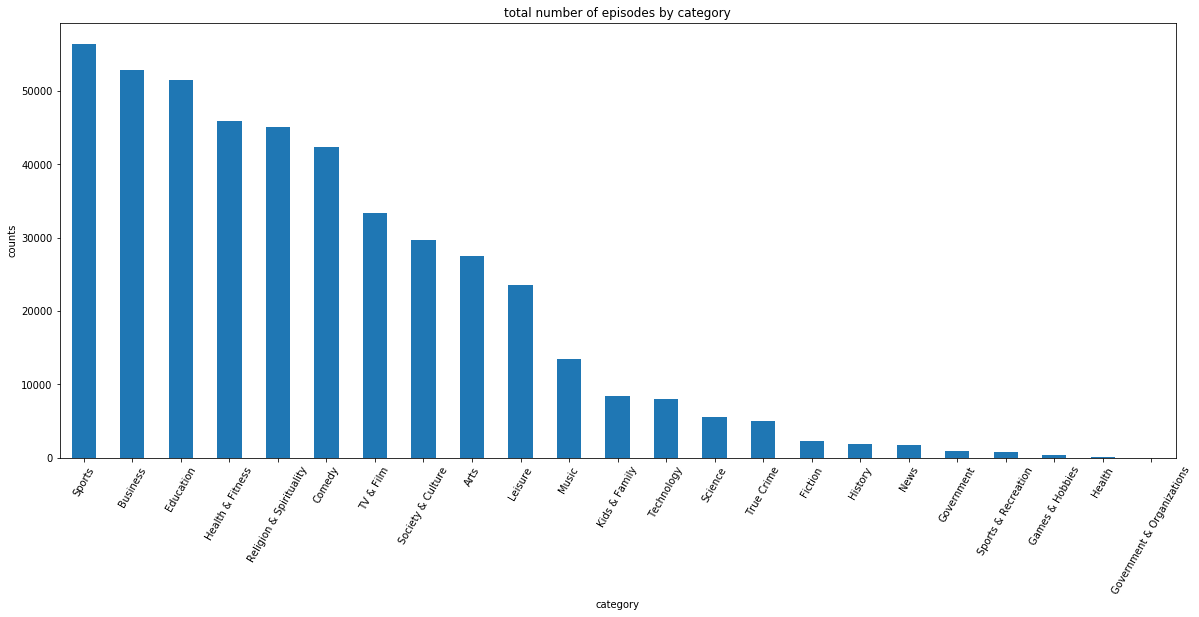

In [86]:
episode_rss_data.groupby('category').count()['show_id'].sort_values(ascending=False).plot(kind='bar',figsize=(20,8),title="total number of episodes by category")
ax.set_ylabel('counts')
ax.set_xlabel('category')
plt.xticks(rotation = 60)
plt.show()

In [12]:
genre_show_count = show_rss_data.groupby('category').count()['show_id'].sort_values(ascending=False).reset_index()
genre_show_count.rename(columns = {'show_id':'counts'}, inplace = True)

In [13]:
genre_show_count["cumpercentage"] = genre_show_count["counts"].cumsum()/genre_show_count["counts"].sum()*100

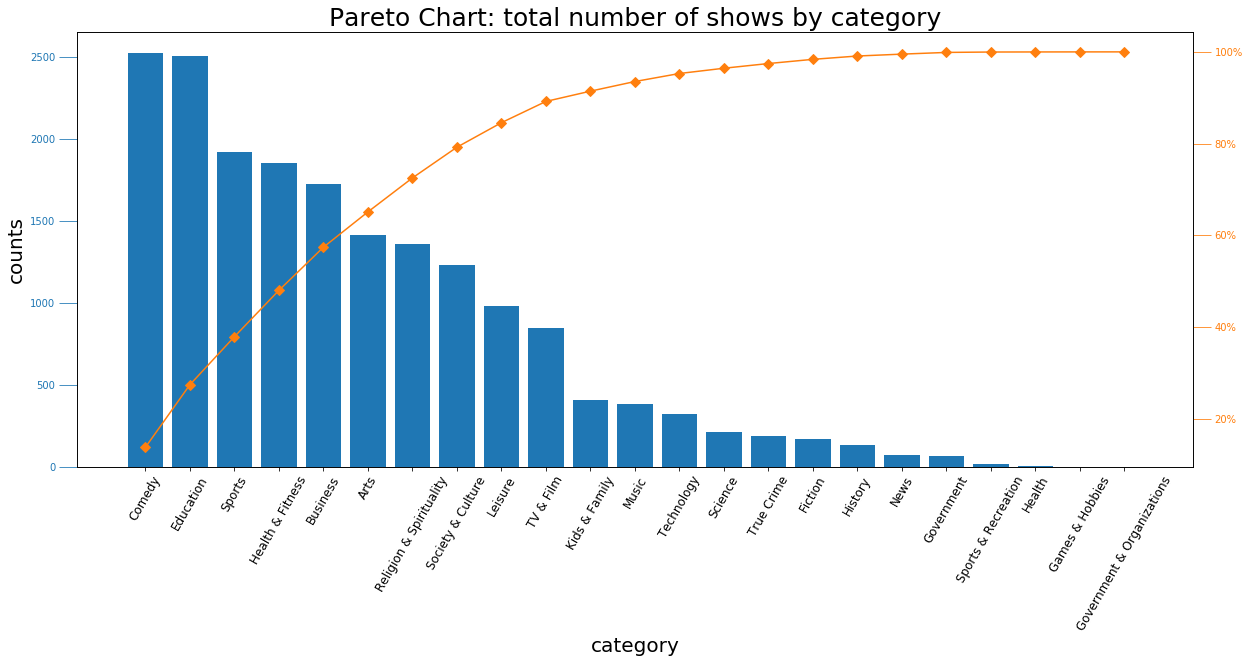

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(genre_show_count["category"], genre_show_count["counts"],color="C0")
ax.set_ylabel('counts', fontsize = 20)
ax.set_xlabel('category', fontsize = 20)
ax.set_xticklabels(labels = genre_show_count["category"], rotation=60, fontsize = 12)

ax2 = ax.twinx()
ax2.plot(genre_show_count["category"], genre_show_count["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0", size = 18)
ax2.tick_params(axis="y", colors="C1", size = 18)

plt.title("Pareto Chart: total number of shows by category", fontsize = 25)
plt.show()